Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



In [5]:
import os
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
os.chdir('/content/drive/MyDrive/exercise07_Abdulrazaq')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import geopandas as gpd

In [7]:
#whats in my directory?
os.listdir()

['MTA_Subway_Stations_and_Complexes.csv',
 'MTA',
 'NYCensusTracts0.25fromStationWithIncome',
 'exercise07_Abdulrazaq.ipynb']

In [9]:
#Read shapefile
#data does not have shapefile format on the website, so i got csv, added layer then exported features from ArcGIs, hoping thats ecceptable
gdf = gpd.read_file('/content/drive/MyDrive/exercise07_Abdulrazaq/MTA')

In [10]:
gdf.head()

,Complex_ID,Is_Complex,Number_Of_,Stop_Name,Display_Na,Constituen,Station_ID,GTFS_Stop_,Borough,Daytime_Ro,Structure_,Latitude,Longitude,ADA,ADA_Notes,geometry
0,1,FALSE,1,Astoria-Ditmars Blvd,Astoria-Ditmars Blvd (N W),Astoria-Ditmars Blvd,1,R01,Q,N W,Elevated,40.775036,-73.912034,0,None,POINT (-73.91203 40.77504)
1,2,FALSE,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,N W,Elevated,40.770258,-73.917843,1,None,POINT (-73.91784 40.77026)
2,3,FALSE,1,30 Av,30 Av (N W),30 Av,3,R04,Q,N W,Elevated,40.766779,-73.921479,0,None,POINT (-73.92148 40.76678)
3,4,FALSE,1,Broadway,Broadway (N W),Broadway,4,R05,Q,N W,Elevated,40.761820,-73.925508,0,None,POINT (-73.92551 40.76182)
4,5,FALSE,1,36 Av,36 Av (N W),36 Av,5,R06,Q,N W,Elevated,40.756804,-73.929575,0,None,POINT (-73.92957 40.75680)


In [11]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

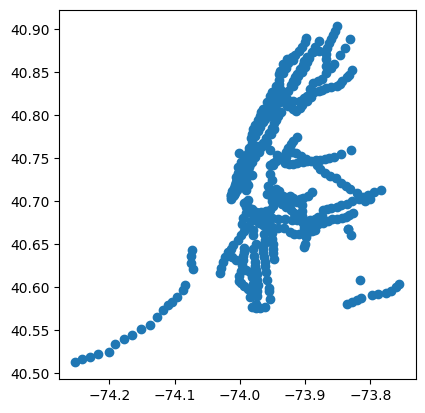

In [12]:
gdf.plot()

In [13]:
# This is where we're getting the WGS84 definition
crs = gdf.crs
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
#How far apart are each of these subway stations
#where is each subway startion. #how far from nearest station is it
#how far from the nearest one is it
#How many ADA accessible subway stations are in each borough

In [15]:
# # subway_stations_gdf = gpd.read_file('/content/drive/MyDrive/exercise07/MTA/MTA.shp')
# # # Group by borough and count ADA accessible stations
# # ada_accessible_by_borough = ada_accessible_stations_gdf.groupby('Borough').size().reset_index(name='Number of ADA Accessible Stations')

# # # Print count for each
# # print(ada_accessible_by_borough)
# # # Calculate the density of subway stations within each neighborhood (complex)
# # subway_density = df.groupby('Complex_ID').size().reset_index(name='Station Count')
# # # Merge density data back to original dataframe
# # subway_data = pd.merge(df, subway_density, on='Complex_ID')
# # df
# # Visualize subway station density
# import matplotlib.pyplot as plt
# plt.hist(subway_density['Station Count'], bins=20, color='blue', edgecolor='black')
# plt.title('Distribution of Subway Station Density')
# plt.xlabel('Number of Stations')
# plt.ylabel('Frequency')
# plt.show()

In [16]:
#trying sth different
import geopy.distance
# Define a function to calculate distance between two coordinates
def calculate_distance(coord1, coord2):
    return geopy.distance.geodesic(coord1, coord2).kilometers #adopted from chatgpt prompt:
    # (how to calculate distance between two points on the earth surface)
    #geodesic(coord1, coord2): This function calculates the geodesic distance between two points on the Earth's surface, given their latitude and longitude coordinates.
    #Geodesic distance is the shortest distance between two points on a curved surface, such as the Earth.

In [17]:
# Calculate per pair distances between all subway stations
#for loop
#make a list to store average distances
average_distances = []
for i in range(len(gdf)):
    for j in range(i+1, len(gdf)):
        coord1 = (gdf.iloc[i]['Latitude'], gdf.iloc[i]['Longitude'])
        coord2 = (gdf.iloc[j]['Latitude'], gdf.iloc[j]['Longitude'])
        distance = calculate_distance(coord1, coord2)
        average_distances.append(distance)

In [18]:
print(average_distances)

[0.722522857871228, 1.2151628135134442, 1.8568952950236295, 2.5085154472012134, 3.0188599669960436, 5.299549893284152, 5.907110651276945, 6.3155863796971925, 7.256748704135237, 7.526630872877633, 8.424539384620315, 9.167956417872244, 10.551381472597592, 11.398843302839014, 11.072592145065974, 12.40221037835255, 13.958491793994032, 14.660690790993984, 15.396496841314802, 16.26703531128633, 16.810483730947237, 17.330847733150108, 18.179064344615753, 18.769574452293988, 19.56892087480837, 20.257275995672725, 12.015864803584662, 13.29065869735112, 13.938673910647923, 14.481239343473275, 15.208264060348876, 15.523927706647875, 16.12275530004087, 16.721107167107995, 17.159267147575793, 17.933497824693287, 18.87412040763693, 19.864726440508385, 20.29541634880341, 21.193806285909023, 22.315854377155322, 22.578328328558847, 22.73956789649537, 22.711056000303763, 15.898179547141108, 16.436714115447213, 16.92349879285418, 17.436249648750028, 18.75732427467856, 19.437777616772305, 20.0435615175070

In [21]:
# Compute the average distance between subway stations
average_distance = sum(average_distances) / len(average_distances)
print("Average distance between subway stations:", average_distance, "kilometers")

Average distance between subway stations: 13.658392133918907 kilometers
